In [100]:
# SECOND QUESTION - Alternative approach
# find the top 10 major project themes (using column 'mjtheme_namecode')

In [127]:
# import libraries

import pandas as pd
import json 
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt

In [109]:
# import data

original_json_df = pd.read_json('data/world_bank_projects.json')

In [111]:
# select 'mjtheme_namecode' column from dataframe

themes_column = original_json_df['mjtheme_namecode']

In [112]:
# put all projects (nested elements) into one list

all_projects = []
for ent in themes_column:
    for dictionary in ent:
        all_projects.append(dictionary)

In [113]:
# use normalization to create a table, each row represents one project theme

normalized_themes_column = json_normalize(all_projects)

In [114]:
# normalized_themes_column 

In [116]:
# count the frequency of each project theme by 'code', since there are missing values in the 'name' column

normalized_themes_column['frequency'] = normalized_themes_column.groupby('code')['code'].transform('count')
#normalized_themes_column

In [117]:
# create a more presentable table with results for distinct project theme
# by replacing missing values with NaN and then remove these NaN values
# after that remove duplicate rows

rows_with_nan = normalized_themes_column.replace('', np.nan, regex=True)
singular_unique_rows = rows_with_nan.dropna().drop_duplicates()
#singular_unique_rows

In [119]:
# sort dataframe with distinct project themes by popularity

sorted_singular_unique_rows = singular_unique_rows.sort_values(by=['frequency'], ascending=False)

In [124]:
# change index, start with 1

sorted_singular_unique_rows.index = range(1, len(sorted_singular_unique_rows)+1)
#sorted_singular_unique_rows

In [125]:
# the top 10 major project themes
ten_project_themes = sorted_singular_unique_rows[:10]
ten_project_themes

,code,name,frequency
1,11,Environment and natural resources management,250
2,10,Rural development,216
3,8,Human development,210
4,2,Public sector governance,199
5,6,Social protection and risk management,168
6,4,Financial and private sector development,146
7,7,Social dev/gender/inclusion,130
8,5,Trade and integration,77
9,9,Urban development,50
10,1,Economic management,38


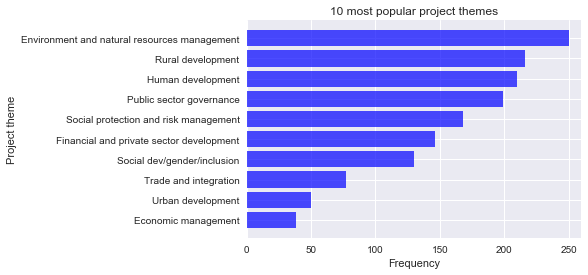

In [128]:
# create a plot with the result
 
# define y-axis
y_pos = np.arange(len(ten_project_themes.name))
index_1 = y_pos[::-1]

# create horizontal bars
plt.barh(index_1, ten_project_themes.frequency, color='blue', align='center', alpha=0.7)

# create names on the y-axis
plt.yticks(index_1, ten_project_themes.name)

plt.title('10 most popular project themes') 
plt.xlabel('Frequency')
plt.ylabel('Project theme')

# set the limit on x-axis
plt.xlim(0,260)

# show graphic
plt.show()